In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import librosa


## Columns, NaN check for all_df/metadata shared by Kaggle:

In [3]:
all_df = pd.read_csv("/users/vsharm44/projects/ssl-bioacoustics/data/CBC2020/all.csv")
all_df.head()

,rating,playback_used,ebird_code,channels,date,pitch,duration,filename,speed,species,...,xc_id,url,country,author,primary_label,longitude,length,time,recordist,license
0,3.5,no,aldfly,1 (mono),2013-05-25,Not specified,25,XC134874.mp3,Not specified,Alder Flycatcher,...,134874,https://www.xeno-canto.org/134874,United States,Jonathon Jongsma,Empidonax alnorum_Alder Flycatcher,-92.962,Not specified,8:00,Jonathon Jongsma,Creative Commons Attribution-ShareAlike 3.0
1,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135454.mp3,both,Alder Flycatcher,...,135454,https://www.xeno-canto.org/135454,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
2,4.0,no,aldfly,2 (stereo),2013-05-27,both,39,XC135455.mp3,both,Alder Flycatcher,...,135455,https://www.xeno-canto.org/135455,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
3,3.5,no,aldfly,2 (stereo),2013-05-27,both,33,XC135456.mp3,both,Alder Flycatcher,...,135456,https://www.xeno-canto.org/135456,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
4,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135457.mp3,level,Alder Flycatcher,...,135457,https://www.xeno-canto.org/135457,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...


In [4]:
print('rows:', len(all_df))
print('cols:', len(all_df.columns))
print('cols:', all_df.columns)
all_df.describe()


rows: 21375
cols: 35
cols: Index(['rating', 'playback_used', 'ebird_code', 'channels', 'date', 'pitch',
       'duration', 'filename', 'speed', 'species', 'number_of_notes', 'title',
       'secondary_labels', 'bird_seen', 'sci_name', 'location', 'latitude',
       'sampling_rate', 'type', 'elevation', 'description', 'bitrate_of_mp3',
       'file_type', 'volume', 'background', 'xc_id', 'url', 'country',
       'author', 'primary_label', 'longitude', 'length', 'time', 'recordist',
       'license'],
      dtype='object')


,rating,duration,xc_id
count,21375.000000,21375.000000,21375.000000
mean,4.068047,55.806784,285004.752140
std,0.988122,76.385696,125160.991016
min,0.000000,0.000000,1634.000000
25%,3.500000,15.000000,174094.500000
50%,4.000000,33.000000,293438.000000
75%,5.000000,68.000000,386885.500000
max,5.000000,2283.000000,505611.000000


In [6]:
# Print unique values for each column
for col in all_df.columns:
    print(f"\n{col}:")
    uniq_list = all_df[col].unique().tolist()
    print(f'unique values: {len(uniq_list)}')
    print(uniq_list)
    print("NAN values:", all_df[col].isna().sum())


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [7]:
all_df.iloc[0]

rating                                                            3.5
playback_used                                                      no
ebird_code                                                     aldfly
channels                                                     1 (mono)
date                                                       2013-05-25
pitch                                                   Not specified
duration                                                           25
filename                                                 XC134874.mp3
speed                                                   Not specified
species                                              Alder Flycatcher
number_of_notes                                         Not specified
title                   XC134874 Alder Flycatcher (Empidonax alnorum)
secondary_labels    ['Empidonax minimus_Least Flycatcher', 'Leioth...
bird_seen                                                         yes
sci_name            

## Recap of data cleaning pipeline from the paper + Ensuring metadata(CSV) sample counts match the data folders' true files/samples counts:

In [ ]:
# thresholding for significant (at least a 100) number of samples per class.

# should be left with 100 birds species and 15,032 samples across nearly balanced classes.

# file path of audio: root_dir + all_audio + ebird_code + filename
# load with sample rate 32000, and use first 7 seconds of the samples. Only keep samples which are at least 7 seconds long, no padding.

# Only use species with at least 20 samples with at least 7 seconds.

# preprocessing has used the first 100 species (by the order of navigating data folders) such that above becomes true, which doesn't make sense based on what they claim in paper.
# let's see if 100 is artificial threshold, or naturally arises after data cleaning.


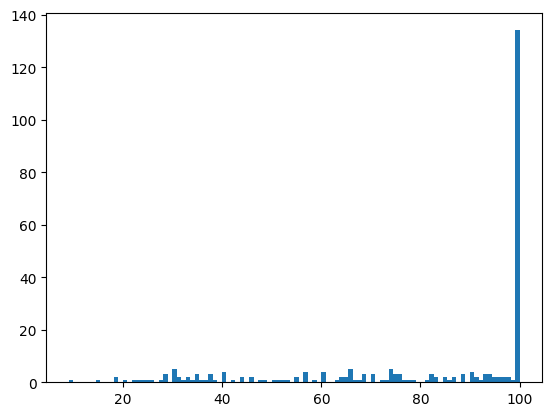

Number of species with less than 100 samples: 130
Number of species with at least 100 samples: 134

Full value counts:
ebird_code
yerwar    100
aldfly    100
yebfly    100
sonspa    100
sora      100
         ... 
lecthr     20
coshum     19
hoomer     19
buffle     15
redhea      9
Name: count, Length: 264, dtype: int64


In [8]:
plt.hist(all_df['ebird_code'].value_counts(), bins=100)
plt.show()

# Get value counts for each ebird_code
value_counts = all_df['ebird_code'].value_counts()
# Count how many species have less than 100 samples
num_species_under_100 = (value_counts < 100).sum()
num_species_over_100 = (value_counts >= 100).sum()
print(f"Number of species with less than 100 samples: {num_species_under_100}")
print(f"Number of species with at least 100 samples: {num_species_over_100}")
print("\nFull value counts:")
print(value_counts)


In [13]:
root_dir = "/users/vsharm44/projects/ssl-bioacoustics/data/CBC2020/all_audio/"
species = []
for d in os.listdir(root_dir):
    if os.path.isdir(os.path.join(root_dir, d)):
        species.append(d)
print(len(species))


264


{'buwwar': 97, 'aldfly': 100, 'yebsap': 63, 'cangoo': 100, 'btywar': 96, 'rebnut': 100, 'wesmea': 100, 'gnttow': 100, 'houwre': 100, 'rocpig': 100, 'ruckin': 100, 'yehbla': 57, 'orcwar': 100, 'vigswa': 52, 'comgol': 87, 'camwar': 76, 'bkhgro': 100, 'brncre': 100, 'rthhum': 31, 'canwar': 100, 'lesgol': 100, 'solsan': 94, 'marwre': 100, 'btnwar': 100, 'reshaw': 73, 'linspa': 100, 'wewpew': 100, 'gcrfin': 31, 'boboli': 100, 'amebit': 44, 'eawpew': 100, 'rethaw': 93, 'chswar': 100, 'rebsap': 32, 'rocwre': 78, 'gryfly': 81, 'scatan': 94, 'norwat': 100, 'bkbmag1': 60, 'swaspa': 100, 'hoowar': 100, 'yerwar': 100, 'sagspa1': 30, 'calqua': 90, 'warvir': 100, 'bulori': 100, 'pinjay': 51, 'pygnut': 60, 'whcspa': 100, 'greroa': 90, 'grcfly': 100, 'balori': 100, 'whfibi': 33, 'tuftit': 100, 'easmea': 100, 'easkin': 82, 'juntit1': 69, 'fiscro': 87, 'swathr': 100, 'amerob': 100, 'perfal': 100, 'pasfly': 100, 'grtgra': 100, 'amtspa': 74, 'buggna': 100, 'grycat': 82, 'plsvir': 92, 'brebla': 49, 'norhar

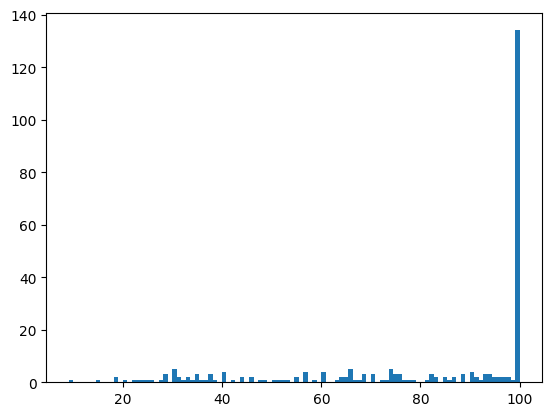

In [14]:
species_samples = {}

for s in species:
    species_samples[s] = len(os.listdir(os.path.join(root_dir, s)))
print(species_samples)

plt.hist(list(species_samples.values()), bins=100)
plt.show()


In [15]:
# Get value counts from dataframe
df_counts = all_df['ebird_code'].value_counts()

# Check that species_samples and df_counts have same keys and values
all_match = True
for species, count in species_samples.items():
    if species not in df_counts.index:
        print(f"Species {species} in species_samples but not in dataframe")
        all_match = False
    elif count != df_counts[species]:
        print(f"Mismatch for {species}: {count} vs {df_counts[species]}")
        all_match = False

if all_match:
    print("All species counts match between files and dataframe")
else:
    print("Found mismatches between files and dataframe")

All species counts match between files and dataframe


## Filter species for counts of samples >= 100, and then drop samples with <7 seconds of audio: 

In [17]:
# Filter for species with >= 100 samples
species_counts = all_df['ebird_code'].value_counts()
species_with_enough_samples = species_counts[species_counts >= 100].index
filtered_df = all_df[all_df['ebird_code'].isin(species_with_enough_samples)]

print(f"Original number of samples: {len(all_df)}")
print(f"Number of samples after filtering: {len(filtered_df)}")
print(f"Number of species after filtering: {len(species_with_enough_samples)}")
# it seems like the max samples per species is 100, and we selected the 134 species with a 100 samples

Original number of samples: 21375
Number of samples after filtering: 13400
Number of species after filtering: 134


In [18]:
# takes about half an hour to run, beware!
root_dir = "/users/vsharm44/projects/ssl-bioacoustics/data/CBC2020/all_audio/"

greater_than_7_seconds = []
less_than_7_seconds = []

for index, row in filtered_df.iterrows():
    file_path = os.path.join(root_dir, row['ebird_code'], row['filename'])
    if not os.path.exists(file_path):
        print(f"File does not exist: {file_path}")
        continue
    try:
        import warnings
        with warnings.catch_warnings(record=True) as w:
            x, _ = librosa.load(file_path, sr=32000)
            if len(x) >= 7 * 32000:
                greater_than_7_seconds.append(index)
            else:
                less_than_7_seconds.append(index)
            if len(w) > 0:
                print(f"Warnings for file: {file_path}")
                for warning in w:
                    print(f"Warning: {warning.message}")
        del x
    except Exception as e:
        print(f"Error loading file: {file_path}")
        print(f"Error: {e}")

print(f"Number of species with samples > 7 seconds: {len(greater_than_7_seconds)}")
print(f"Number of species with samples < 7 seconds: {len(less_than_7_seconds)}")


Note: Illegal Audio-MPEG-Header 0x72616368 at offset 842105.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x64616517 at offset 2417920.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x50455441 at offset 394679.
Note: Trying to resync...
Note: Skipped 1024 bytes in input.
[src/libmpg123/parse.c:wetwork():1349] error: Giving up resync after 1024 bytes - your stream is not nice... (maybe increasing resync limit could help).


Error loading file: /users/vsharm44/projects/ssl-bioacoustics/data/CBC2020/all_audio/amepip/XC113723.mp3
Error: 


Note: Illegal Audio-MPEG-Header 0x61727420 at offset 842523.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x49535400 at offset 486784.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x29090000 at offset 404501.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x00000000 at offset 320074.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x20284869 at offset 1831414.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x73746963 at offset 1043561.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x00000000 at offset 1678023.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x50455441 at

Error loading file: /users/vsharm44/projects/ssl-bioacoustics/data/CBC2020/all_audio/grtgra/XC395021.mp3
Error: 


Note: Illegal Audio-MPEG-Header 0x3234202f at offset 141671.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x50455441 at offset 395933.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x53540041 at offset 452149.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x20447566 at offset 817408.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x63686572 at offset 3063808.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x50455441 at offset 358107.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x63686572 at offset 483328.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x00004745 at o

Number of species with samples > 7 seconds: 12343
Number of species with samples < 7 seconds: 1055


In [19]:
print(f"Number of samples with samples > 7 seconds: {len(greater_than_7_seconds)}")
print(f"Number of samples with samples < 7 seconds: {len(less_than_7_seconds)}")

Number of samples with samples > 7 seconds: 12343
Number of samples with samples < 7 seconds: 1055


In [31]:
filtered_df

,rating,playback_used,ebird_code,channels,date,pitch,duration,filename,speed,species,...,xc_id,url,country,author,primary_label,longitude,length,time,recordist,license
0,3.5,no,aldfly,1 (mono),2013-05-25,Not specified,25,XC134874.mp3,Not specified,Alder Flycatcher,...,134874,https://www.xeno-canto.org/134874,United States,Jonathon Jongsma,Empidonax alnorum_Alder Flycatcher,-92.962,Not specified,8:00,Jonathon Jongsma,Creative Commons Attribution-ShareAlike 3.0
1,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135454.mp3,both,Alder Flycatcher,...,135454,https://www.xeno-canto.org/135454,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
2,4.0,no,aldfly,2 (stereo),2013-05-27,both,39,XC135455.mp3,both,Alder Flycatcher,...,135455,https://www.xeno-canto.org/135455,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
3,3.5,no,aldfly,2 (stereo),2013-05-27,both,33,XC135456.mp3,both,Alder Flycatcher,...,135456,https://www.xeno-canto.org/135456,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
4,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135457.mp3,level,Alder Flycatcher,...,135457,https://www.xeno-canto.org/135457,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21272,4.5,no,yerwar,1 (mono),2019-05-16,Not specified,27,XC475102.mp3,Not specified,Myrtle Warbler,...,475102,https://www.xeno-canto.org/475102,United States,Jim Berry,Setophaga coronata_Yellow-rumped Warbler,-79.441,Not specified,09:30,Jim Berry,Creative Commons Attribution-NonCommercial-Sha...
21273,4.0,no,yerwar,2 (stereo),2019-05-18,Not specified,34,XC475291.mp3,Not specified,Myrtle Warbler,...,475291,https://www.xeno-canto.org/475291,Canada,Christopher Moser-Purdy,Setophaga coronata_Yellow-rumped Warbler,-114.3995,0-3(s),09:30,Christopher Moser-Purdy,Creative Commons Attribution-NonCommercial-Sha...
21274,4.0,no,yerwar,2 (stereo),2019-09-25,Not specified,29,XC499252.mp3,Not specified,Myrtle Warbler,...,499252,https://www.xeno-canto.org/499252,United States,William Whitehead,Setophaga coronata_Yellow-rumped Warbler,-74.2621,Not specified,07:00,William Whitehead,Creative Commons Attribution-NonCommercial-Sha...
21275,5.0,no,yerwar,2 (stereo),2019-10-18,Not specified,28,XC503063.mp3,Not specified,Myrtle Warbler,...,503063,https://www.xeno-canto.org/503063,United States,William Whitehead,Setophaga coronata_Yellow-rumped Warbler,-73.996,Not specified,08:00,William Whitehead,Creative Commons Attribution-NonCommercial-Sha...


In [35]:
longer_than_7_seconds_df = filtered_df.loc[greater_than_7_seconds]
print(len(longer_than_7_seconds_df), len(greater_than_7_seconds), len(filtered_df))
longer_than_7_seconds_df.head()

12343 12343 13400


,rating,playback_used,ebird_code,channels,date,pitch,duration,filename,speed,species,...,xc_id,url,country,author,primary_label,longitude,length,time,recordist,license
0,3.5,no,aldfly,1 (mono),2013-05-25,Not specified,25,XC134874.mp3,Not specified,Alder Flycatcher,...,134874,https://www.xeno-canto.org/134874,United States,Jonathon Jongsma,Empidonax alnorum_Alder Flycatcher,-92.962,Not specified,8:00,Jonathon Jongsma,Creative Commons Attribution-ShareAlike 3.0
1,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135454.mp3,both,Alder Flycatcher,...,135454,https://www.xeno-canto.org/135454,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
2,4.0,no,aldfly,2 (stereo),2013-05-27,both,39,XC135455.mp3,both,Alder Flycatcher,...,135455,https://www.xeno-canto.org/135455,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
3,3.5,no,aldfly,2 (stereo),2013-05-27,both,33,XC135456.mp3,both,Alder Flycatcher,...,135456,https://www.xeno-canto.org/135456,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
4,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135457.mp3,level,Alder Flycatcher,...,135457,https://www.xeno-canto.org/135457,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...


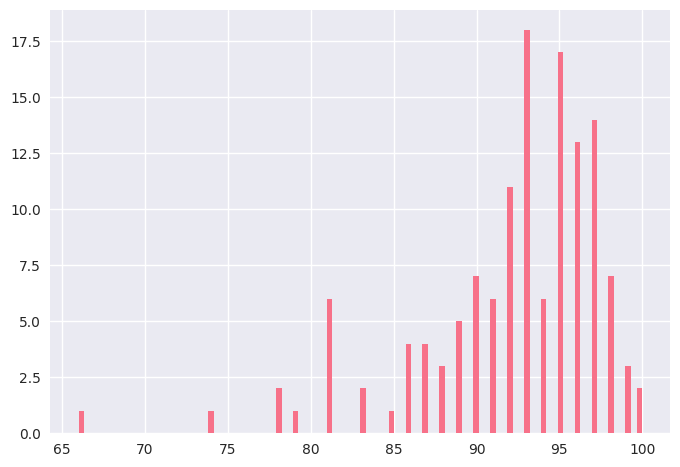

ebird_code
reevir1    100
brespa     100
buhvir      99
herthr      99
eastow      99
          ... 
gadwal      79
amepip      78
eucdov      78
pilwoo      74
greegr      66
Name: count, Length: 134, dtype: int64


In [36]:
plt.hist(longer_than_7_seconds_df['ebird_code'].value_counts(), bins=100)
plt.show()
print(longer_than_7_seconds_df['ebird_code'].value_counts())

## Out of the filtered species (by > 100 samples, and then >= 7 seconds of audio), take the top-100 species:

In [37]:
# Get value counts of ebird codes and take top 100
top_100_species = longer_than_7_seconds_df['ebird_code'].value_counts().nlargest(100)

# Filter dataframe to only include those top 100 species
top_100_df = longer_than_7_seconds_df[longer_than_7_seconds_df['ebird_code'].isin(top_100_species.index)]

print(f"Shape of filtered dataframe with top 100 species: {top_100_df.shape}")
print("\nNumber of samples per species:")
print(top_100_df['ebird_code'].value_counts())


Shape of filtered dataframe with top 100 species: (9470, 35)

Number of samples per species:
ebird_code
brespa     100
reevir1    100
eastow      99
buhvir      99
herthr      99
          ... 
mallar3     91
rebwoo      91
amecro      90
gockin      90
wilsni1     90
Name: count, Length: 100, dtype: int64


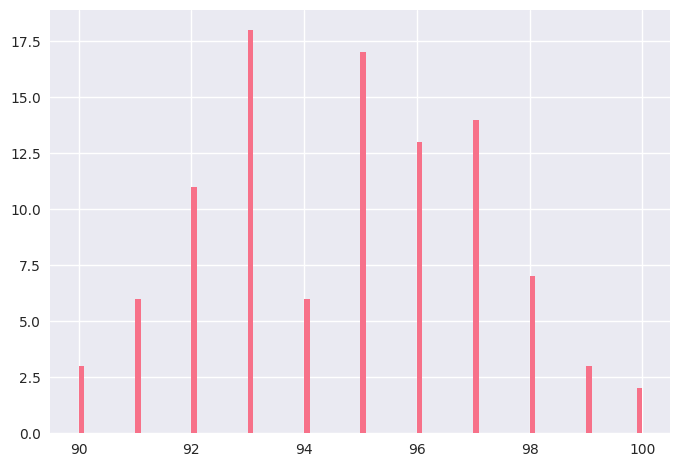

In [38]:
plt.hist(top_100_df['ebird_code'].value_counts(), bins=100)
plt.show()


In [43]:
top_100_df = top_100_df.reset_index(drop=True)
top_100_df.head()
top_100_df.to_csv("/users/vsharm44/projects/ssl-bioacoustics/data/CBC2020/top_100_species.csv", index=False)


## EDA on the new dataset of 100 species:

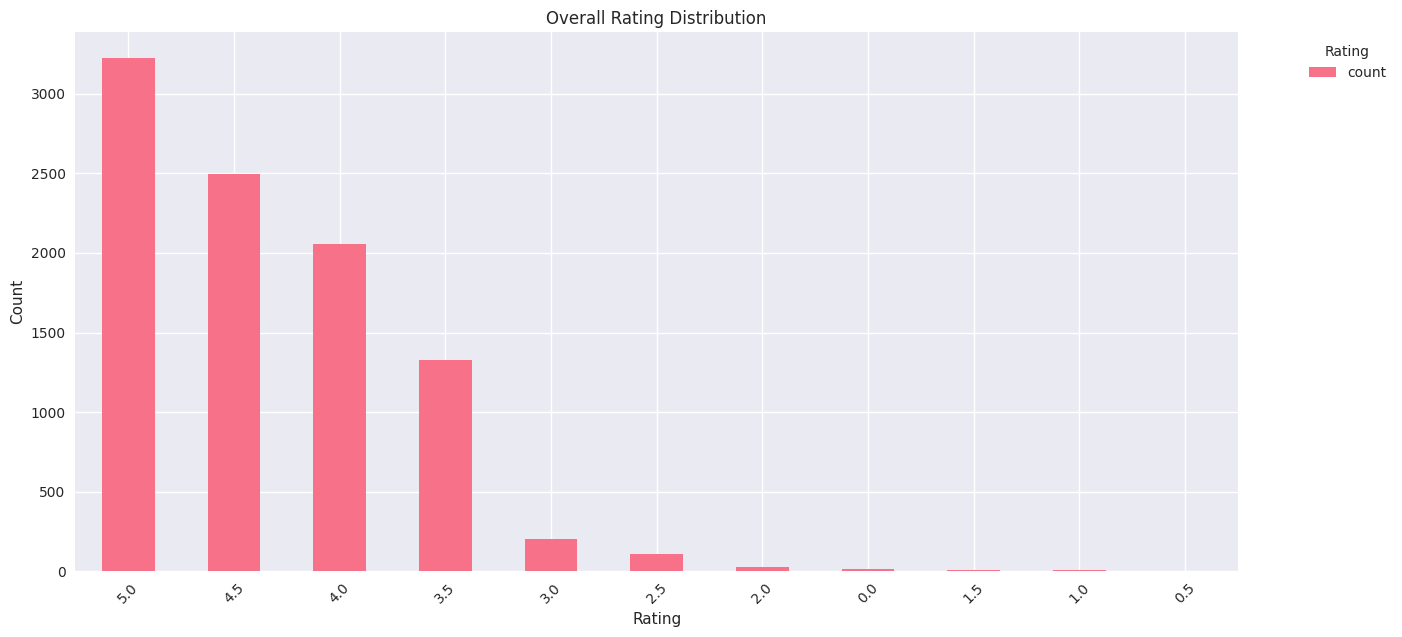

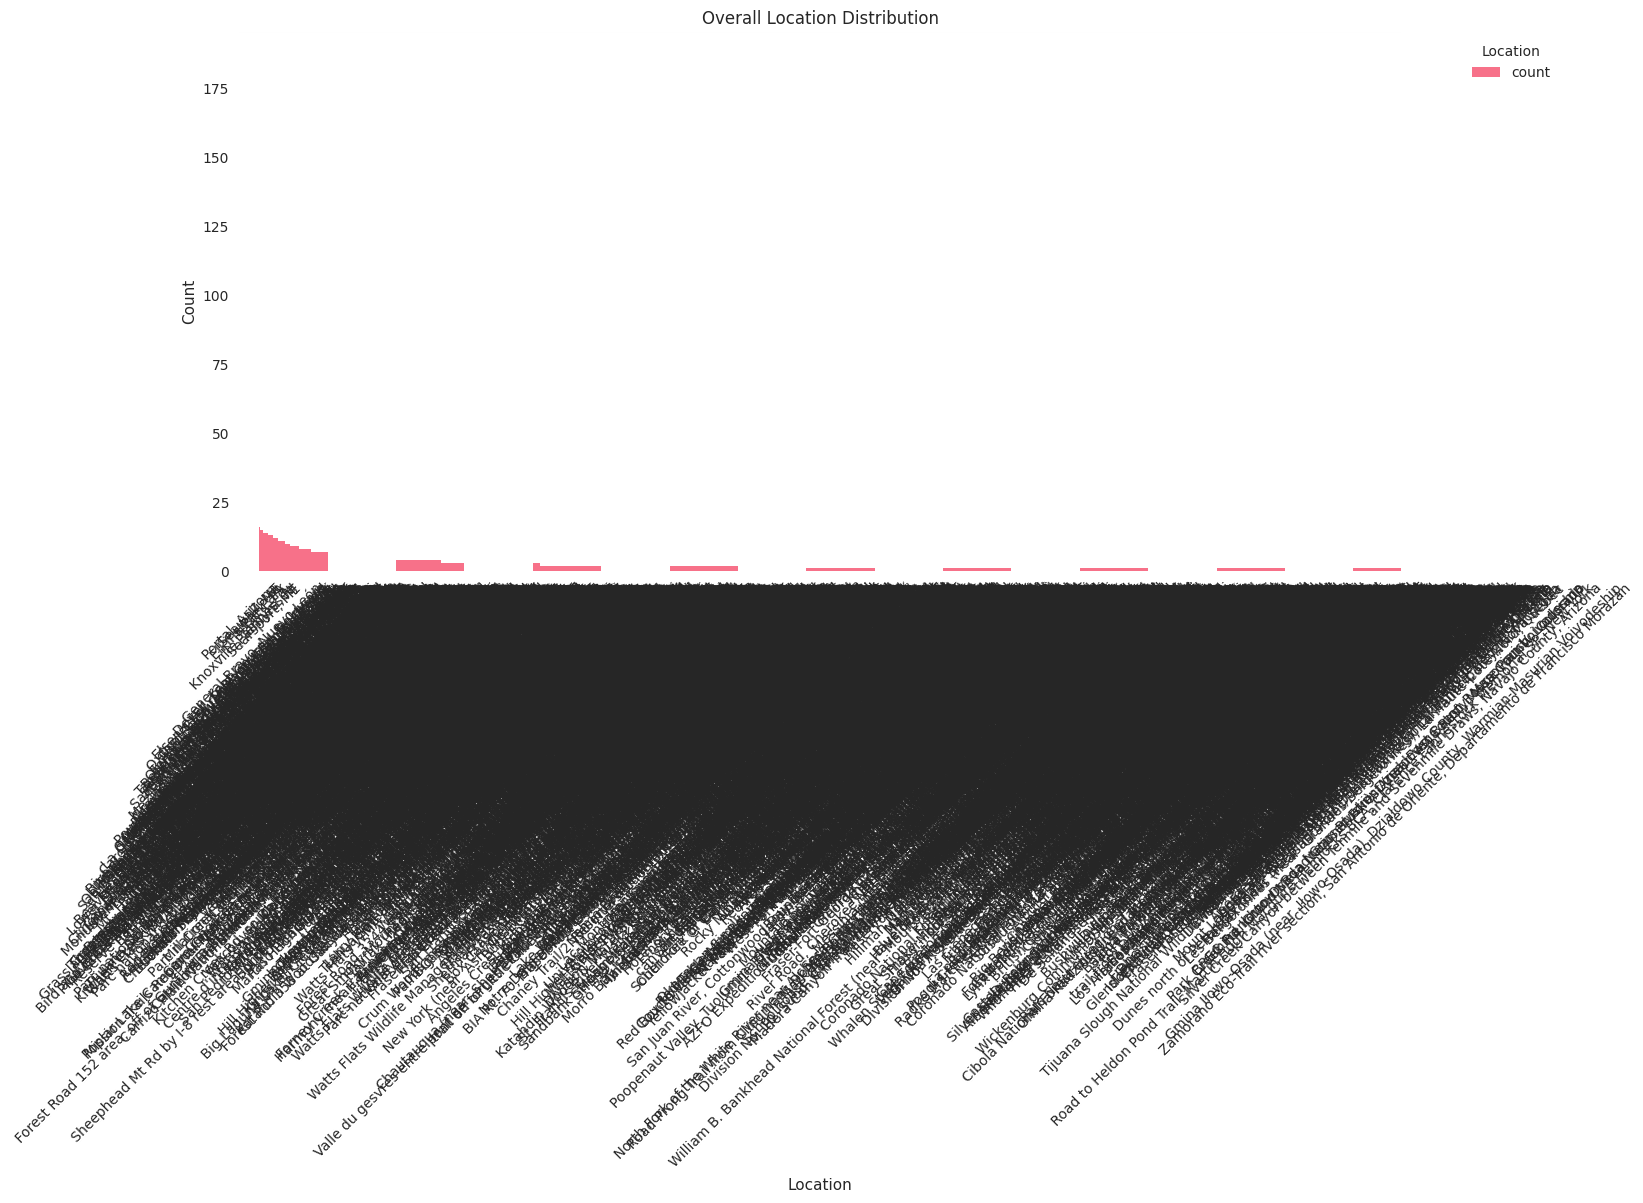

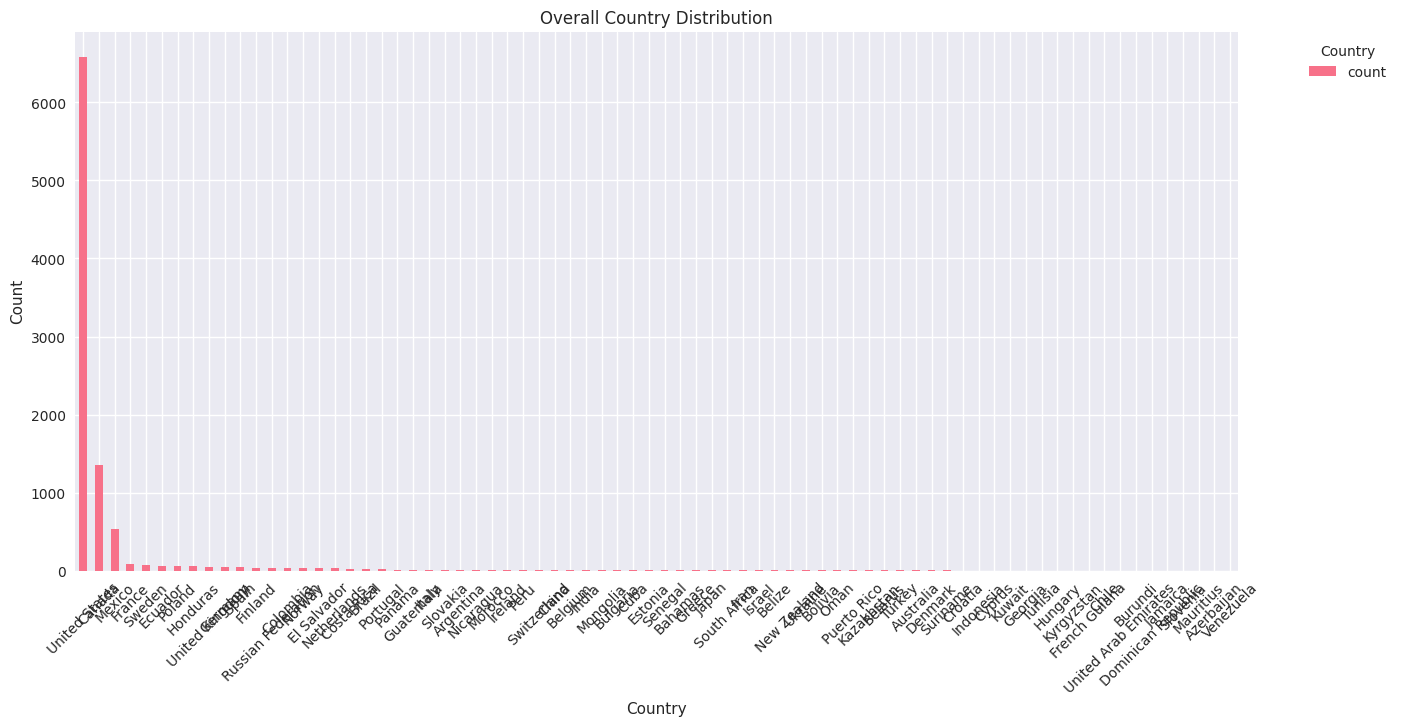


Summary Statistics:

Rating Distribution:
rating
5.0    3225
4.5    2496
4.0    2059
3.5    1329
3.0     205
2.5     106
2.0      25
0.0      13
1.5       6
1.0       5
0.5       1
Name: count, dtype: int64
\Location Distribution:
location
Portal, Arizona                                                  186
Oxford, Lafayette County, Mississippi                             65
Elsen's Hill, DuPage County, Illinois                             58
River Lakes Conservation Area near Viera, Brevard Co, Florida     52
Tama (near  Burlington), Des Moines, Iowa                         50
                                                                ... 
Reserva El Jaguar, Jinotega                                        1
Parque Nacional Sierra de Agalta, sector Talgua-La Florida         1
Moose Lake, Mendenhall Valley, Juneau, Alaska                      1
San Juan Opico, La Libertad                                        1
Parque Bicentenario                                                1


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the data
df = pd.read_csv('/users/vsharm44/projects/ssl-bioacoustics/data/CBC2020/top_100_species.csv')

# Set style for better visualization
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Function to create distribution plots
def plot_distribution(column, title, figsize=(15, 7)):
    plt.figure(figsize=figsize)

    # Plot overall distribution
    plt.subplot(1, 1, 1)
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Overall {title} Distribution')
    plt.xlabel(title)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    plt.legend(title=title, bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()

# Plot rating distribution
plot_distribution('rating', 'Rating')

# Plot location distribution
plot_distribution('location', 'Location')

# Plot country distribution
plot_distribution('country', 'Country')

# Summary statistics
print("\nSummary Statistics:")

print("\nRating Distribution:")
print(df['rating'].value_counts())

print("\Location Distribution:")
print(df['location'].value_counts())

print("\nCountry Distribution:")
print(df['country'].value_counts())

In [41]:
# Create sample column by combining ebird_code and filename
df['sample'] = df['ebird_code'] + '/' + df['filename']

# Create mapping of ebird_code to integer labels
unique_codes = sorted(df['ebird_code'].unique())
label_mapping = {code: i for i, code in enumerate(unique_codes)}

# Create label column using the mapping
df['label'] = df['ebird_code'].map(label_mapping)

# Save the label mapping to json
import json
with open('/users/vsharm44/projects/ssl-bioacoustics/data/CBC2020/class_to_idx.json', 'w') as f:
    json.dump(label_mapping, f)

In [42]:
df.head()

,rating,playback_used,ebird_code,channels,date,pitch,duration,filename,speed,species,...,country,author,primary_label,longitude,length,time,recordist,license,sample,label
0,3.5,no,aldfly,1 (mono),2013-05-25,Not specified,25,XC134874.mp3,Not specified,Alder Flycatcher,...,United States,Jonathon Jongsma,Empidonax alnorum_Alder Flycatcher,-92.962,Not specified,8:00,Jonathon Jongsma,Creative Commons Attribution-ShareAlike 3.0,aldfly/XC134874.mp3,0
1,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135454.mp3,both,Alder Flycatcher,...,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,aldfly/XC135454.mp3,0
2,4.0,no,aldfly,2 (stereo),2013-05-27,both,39,XC135455.mp3,both,Alder Flycatcher,...,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,aldfly/XC135455.mp3,0
3,3.5,no,aldfly,2 (stereo),2013-05-27,both,33,XC135456.mp3,both,Alder Flycatcher,...,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,aldfly/XC135456.mp3,0
4,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135457.mp3,level,Alder Flycatcher,...,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,aldfly/XC135457.mp3,0


In [44]:
# class stratified sampling

import numpy as np
# split the df into train, val, test sets with 80%, 10%, 10% split respectively.

# Split each class (ebird_code) into train/val/test with 80/10/10 ratio
train_dfs = []
val_dfs = []
test_dfs = []

for species in df['ebird_code'].unique():
    species_df = df[df['ebird_code'] == species]
    
    # Shuffle the species data
    species_df = species_df.sample(frac=1, random_state=42)
    
    # Calculate split indices
    train_idx = int(0.8 * len(species_df))
    val_idx = int(0.9 * len(species_df))
    
    # Split the data (0-80% train, 80-90% val, and 90-100% test)
    train_dfs.append(species_df.iloc[:train_idx])
    val_dfs.append(species_df.iloc[train_idx:val_idx])
    test_dfs.append(species_df.iloc[val_idx:])

# Concatenate all splits
train_df = pd.concat(train_dfs)
val_df = pd.concat(val_dfs)
test_df = pd.concat(test_dfs)

# Shuffle each split again to mix species
train_df = train_df.sample(frac=1, random_state=42)
val_df = val_df.sample(frac=1, random_state=42)
test_df = test_df.sample(frac=1, random_state=42)

print(len(train_df), len(val_df), len(test_df))



7534 939 997


In [46]:
train_df = train_df.reset_index(drop=True)
train_df.to_csv("/users/vsharm44/projects/ssl-bioacoustics/data/CBC2020/train.csv", index=False)

val_df = val_df.reset_index(drop=True)
val_df.to_csv("/users/vsharm44/projects/ssl-bioacoustics/data/CBC2020/val.csv", index=False)

test_df = test_df.reset_index(drop=True)
test_df.to_csv("/users/vsharm44/projects/ssl-bioacoustics/data/CBC2020/test.csv", index=False)

## Copy actual samples/audio files to the train, test and val folders

In [49]:
import shutil

splits = ["train", "val", "test"]

for split in splits:
    # create split dir if doesn't exist
    split_dir = os.path.join("/users/vsharm44/projects/ssl-bioacoustics/data/CBC2020", split)
    os.makedirs(split_dir, exist_ok=True)

    # create a subdir for each class or ebird_code in a split
    split_df = pd.read_csv(f"/users/vsharm44/projects/ssl-bioacoustics/data/CBC2020/{split}.csv")
    for species in split_df['ebird_code'].unique():
        species_dir = os.path.join(split_dir, species)
        os.makedirs(species_dir, exist_ok=True)

    # copy the audio files (sample) from all_audio to split_dir
    for idx, row in split_df.iterrows():
        file_with_folder = row['sample']
        src_path = os.path.join("/users/vsharm44/projects/ssl-bioacoustics/data/CBC2020/all_audio", file_with_folder)
        dst_path = os.path.join(split_dir, file_with_folder)
        shutil.copy(src_path, dst_path)

    print(f"Status, done split: {split}")

print("Status, done all splits")


Status, done split: train
Status, done split: val
Status, done split: test
Status, done all splits


In [53]:
## cleanup empty directories
splits = ["train", "val", "test"]

for split in splits:
    split_dir = os.path.join("/users/vsharm44/projects/ssl-bioacoustics/data/CBC2020", split)

    for ebird_code in os.listdir(split_dir):
        species_dir = os.path.join(split_dir, ebird_code)
        if os.path.exists(species_dir) and len(os.listdir(species_dir)) == 0:
            os.rmdir(species_dir)
            print(f"Removed empty directory: {species_dir}")
